In [3]:
%pylab inline
import psycopg2
from pyiem.network import Table as NetworkTable
import pandas as pd
from pandas.io.sql import read_sql
from pyiem.plot import MapPlot
import numpy as np

#MESOSITE = psycopg2.connect(database='mesosite', user='nobody', host='iemdb')
#mcursor = MESOSITE.cursor()

#networks = ['AWOS',]
#mcursor.execute("""SELECT distinct network from stations where country = 'US' and 
# network ~* 'ASOS' and length(id) < 4""")
#for row in mcursor:
#    networks.append( row[0] )
networks = ['IA_ASOS', 'AWOS']
nt = NetworkTable(networks)

Populating the interactive namespace from numpy and matplotlib


In [40]:
ASOS = psycopg2.connect(database='iem', user='nobody',host='iemdb')
df = read_sql("""
  select max(day), id, network, name, st_x(geom) as lon, st_y(geom) as lat from summary s JOIN stations t on (t.iemid = s.iemid) WHERE
  t.network in ('IA_ASOS','AWOS') and max_dwpf >= 79.5 GROUP by id, network, name, lon, lat ORDER by id 
""", ASOS, index_col='id')
#    vals.append( row[0].strftime("%-m/%-d\n%Y" if row[0].year != 2014 else "%-m/%-d") )


In [41]:
df.sort_values('max', inplace=True)
df.reset_index(inplace=True)
df['labels'] = df.apply(lambda x: "%s\n%s" % (x['name'], x['max'].strftime("%-m/%-d/%Y" if x['max'].year != 2016 else "%-m/%-d"),),
                       axis=1)
print df


     id         max  network             name        lon        lat  \
0   DSM  2010-08-10  IA_ASOS       DES MOINES -93.653114  41.533950   
1   IIB  2011-06-13     AWOS     INDEPENDENCE -91.950400  42.454428   
2   DEH  2011-07-19     AWOS          DECORAH -91.743314  43.275519   
3   ALO  2011-07-27  IA_ASOS         Waterloo -92.401293  42.554365   
4   GGI  2011-08-01     AWOS         Grinnell -92.733197  41.709731   
5   SUX  2011-08-01  IA_ASOS       SIOUX CITY -96.379478  42.391678   
6   SPW  2011-08-01  IA_ASOS          SPENCER -95.210088  43.168218   
7   ORC  2011-08-01     AWOS      Orange City -96.060586  42.989492   
8   MCW  2011-08-01  IA_ASOS       MASON CITY -93.326097  43.154383   
9   DBQ  2011-08-02  IA_ASOS          DUBUQUE -90.709143  42.398350   
10  OXV  2011-08-06     AWOS        Knoxville -93.111392  41.298447   
11  CAV  2012-07-23     AWOS          CLARION -93.759258  42.743042   
12  FXY  2014-03-27     AWOS      Forest City -93.623669  43.232317   
13  EB

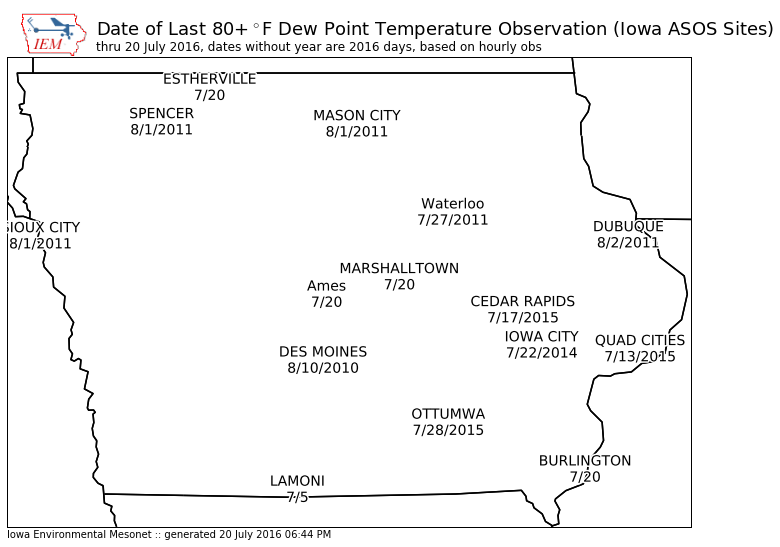

In [44]:
m = MapPlot(sector='iowa', axisbg='white',
            title='Date of Last 80+$^\circ$F Dew Point Temperature Observation (Iowa ASOS Sites)',
            subtitle='thru 20 July 2016, dates without year are 2016 days, based on hourly obs')

df2 = df[df['network']=='IA_ASOS']
m.plot_values(df2['lon'], df2['lat'], df2['labels'], '%s', labelbuffer=1)
#m.contourf(lons, lats, vals, np.arange(750,2051,100), units='total change in mb')
# m.drawcounties()
m.postprocess(filename='160721.png')

